The deadline for this homework is on **20.05.2022 15:49** (right before the practice session). After completing the exercises, you should

1. Download this file into your computer (`File` $\to$ `Download .ipynb`)

2. Download the python files (`.py`) (*if there are any attached to the homework that you need to complete*). 

3. Compress the above files (`.zip` `.rar`) and name the compressed file in the following way *HWx_NameSurname* (for example `HW3_AnunAzganun.zip`)

4. Send the compressed file to this email address `fast.1991.ml@gmail.com` with subject **ML3**

**Note**

* if you do not follow any of the above conditions, your homework will not be graded.

* you do not need to send any dataset files or helper scripts that I provide with your homework (since I already have them).

* you need to write the code for the exercises yourself; you can use ``built-in functions``, ``numpy``, ``pandas``
and ``matplotlib``. Use of other libraries or packages (e.g., scikit-learn) will result in points deducted.

# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw2.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [2]:
cd drive/MyDrive/ML/Homework3

/content/drive/MyDrive/ML/Homework3


5. Now that we are in the desired location, we can unzip the compressed file. 

  **Note that this step needs to be done only once**

In [3]:
# !unzip hw3.zip

6. Run the below code snippet to import all the necessary libraries, as well as the modules (``knn.py`` and ``naive_bayes.py``), which you will fill in soon.

# Decision Trees

In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

Complete the incomplete parts in `decision_tree.py` script and import the `DTClassifier`. If you have never used recursive functions in python before, you may want to read [this](https://realpython.com/python-thinking-recursively/) or any similar tutorial to have more idea about the recursive functions in the code. 

The dataset (`train.csv`) that we will work with, is the famous Titanic dataset from [kaggle](https://www.kaggle.com/c/titanic), where the goal is to predict whether a passenger survived or not.

In [5]:
from decision_tree import DTClassifier

In [6]:
df = pd.read_csv('train.csv')

**Problem1** For now, leave only the following columns: ``'Pclass', 'Sex', 'Survived'``(label).

In [7]:
data = df[['Pclass','Sex','Survived']]

When you are done filling the code, run the below code cell in order to check it. If everything is correct, then you want see any errors, otherwise you should resolve the errors before going ahead.

In [8]:
# DO NOT CHANGE ANYTHING IN THIS CELL
assert data.shape == (891, 3)
assert list(data.columns) == ['Pclass', 'Sex', 'Survived']
assert list(data.values[0]) == [3, 'male', 0]
# DO NOT CHANGE ANYTHING IN THIS CELL

Now that you have prepared the first version of the dataset, split it into train (80%) / test (20%) sets using the [``train_test_split``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn (we will use random_seed in order to get the same sets).

In [9]:
y = data.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size = 0.2,random_state=0)

In [10]:
# DO NOT CHANGE ANYTHING IN THIS CELL
assert X_train.shape == (712, 2)
assert X_test.shape == (179, 2)
assert list(X_test.values[0]) == [3, 'male']
# DO NOT CHANGE ANYTHING IN THIS CELL

Train a classifier on the training set and calculate the accuracy by running the code below. If you have implemented everything correctly, you should get about 79% accuracy on the test set with gini and entropy impurity measures.

In [11]:
model = DTClassifier(impurity='gini')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(accuracy_score(prediction, y_test.values))

0.7877094972067039


In [12]:
model = DTClassifier(impurity='entropy')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(accuracy_score(prediction, y_test))

0.7877094972067039


**Problem2** Add the feature ``Age`` as well and make sure there are no missing values in the data (delete the rows that have missing values). Hint: you may want to use the ``dropna()`` method from pandas.

In [13]:
data_with_age = df[['Pclass','Sex','Age','Survived']].dropna()
data_with_age.head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [14]:
# DO NOT CHANGE ANYTHING IN THIS CELL
assert list(data_with_age.columns) == ['Pclass', 'Sex', 'Age', 'Survived']
assert data_with_age.shape == (714, 4)
# DO NOT CHANGE ANYTHING IN THIS CELL

Split the data into train 80% / test 20% splits as you have done above

In [15]:
y = data_with_age.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(data_with_age,y,test_size=0.2,
                                                   random_state=0)

Run the code below and see if you get about 81% accuracy with both of the impurity measures.

In [16]:
model = DTClassifier(impurity='gini')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

0.8181818181818182

In [17]:
model = DTClassifier(impurity='entropy')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

0.8181818181818182

**Problem3** Let's compare with sklearn's implementation on both of the cases (with and without ``Age`` feature). We need to encode the non-numeric features first, which can be done by running the code below. 

In [18]:
data = df[['Pclass', 'Sex', 'Age', 'Survived']]
data.shape

(891, 4)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

data_noage = pd.get_dummies(data, drop_first=True).drop('Age',axis=1)
data_withage = pd.get_dummies(data, drop_first=True).dropna()


**Question** Read the documentation of [``get_dummies``](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function from pandas and explain what is the purpose of using ``drop_first=True``

**Answer**

drop_first = True դեպքում, k հատ կատեգորիկ դատան վերածում է k-1 հատ թվայինի։ 
False դեպքում կունենայինք Sex_male (male = 1,female = 0) և Sex_female (male = 0, female = 1), որը հավելյալ սյուն է ստեղծում։ Նույն արդյունքն ենք ստանում մեկ Sex_male սյունով, որտեղ 1-ը տղամարդիկ են, 0-ն կանայք։

Make sure you split the transformed data as you have done above using the same ``random_seed``

In [20]:
y = data_noage.pop('Survived')

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_noage, y, test_size = 0.2,random_state=0)

In [21]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train1, y_train1)
prediction1 = model1.predict(X_test1)
accuracy_score(prediction1, y_test1)

0.7877094972067039

In [22]:
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(X_train1, y_train1)
prediction1 = model1.predict(X_test1)
accuracy_score(prediction1, y_test1)

0.7877094972067039

Now check the case with `Age` variable.

In [23]:
y = data_withage.pop('Survived')
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_withage,y,test_size = 0.2,random_state=0)

In [24]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train2, y_train2)
prediction1 = model1.predict(X_test2)
accuracy_score(prediction1, y_test2)

0.8041958041958042

In [25]:
model1 = DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.1,max_depth=4)
model1.fit(X_train2, y_train2)
prediction1 = model1.predict(X_test2)
accuracy_score(prediction1, y_test2)

0.7972027972027972

**Question** Do you get the same results as sklearn's implementation? If not, can you guess what the difference is? Visualizing the decision tree (sklearn's) trained on a few data points (so that you get a short tree) may be useful. You can use [this link](https://stackoverflow.com/questions/52654280/visualizing-decision-tree-not-using-graphviz-web) for visualizing utils.

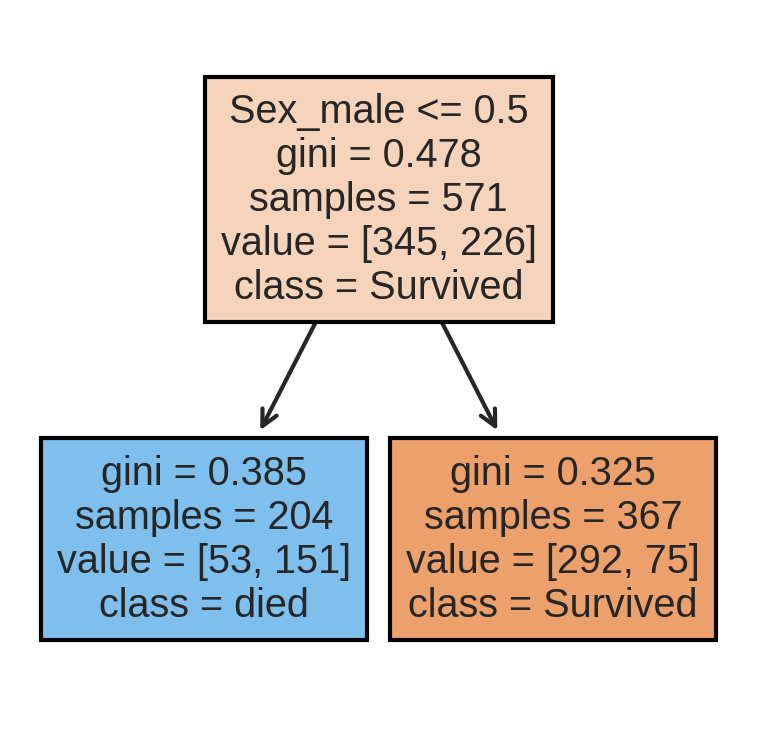

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
fn=['Pclass','Age','Sex_male']
cn=[ 'Survived','died']
tree.plot_tree(model1,
           feature_names = fn, 
           class_names=cn,
           max_depth=5,
           filled = True);

fig.savefig('imagename.png')

**Answer**

**Bonus Problem** Modify your implementation so that you get the same results as with the sklearn's implementation.

**Problem4** Find a good set of hyper-parameters in order to get a good classifier (either with your or sklearn's implementation) on the test set (with the Age feature). You may want to use the K-Fold Cross Validation technique, but you are free to come up with your own approach as long as you explain it below.

In [27]:
test = X_train.copy()
test['Survived'] = y_train.values
test.shape

(571, 4)

In [28]:
parameters = {'criterion':('gini', 'entropy'),
              'max_depth': [3, 5, 10, 15],
              'min_samples_split': [2, 4, 6, 10],
              'min_impurity_decrease': [0, 0.1, 0.15]}

In [29]:
def funct(criterion,max_depth,min_samples_split,min_impurity):
  zangvac = np.array_split(test,min_samples_split)

  a = zangvac.copy()
  acc = []
  for i in range(len(a)):
    # mi haty hanecinq, inqy darav Test-y, mnacacy Train-y
    a = zangvac.copy()
    b = a.copy()
    del b[i]

    curx_train = pd.concat(b)
    curx_train = pd.get_dummies(curx_train,drop_first=True)
    cury_train = curx_train.pop('Survived')

    curx_test = a[i]
    curx_test = pd.get_dummies(curx_test,drop_first=True)
    cury_test = curx_test.pop('Survived')

    model_test = DecisionTreeClassifier(criterion=criterion,\
                                        min_impurity_decrease=min_impurity,max_depth = max_depth)
    
    model_test.fit(curx_train, cury_train)
    prediction = model_test.predict(curx_test)
    acc.append(accuracy_score(prediction, cury_test))

  return(sum(acc)/len(acc))

In [30]:
best_crit, best_depth, best_split, best_impurity = '',0,0,0
best_acc = 0

for crit in parameters['criterion']:
  for depth in parameters['max_depth']:
    for samples in parameters['min_samples_split']:
      for impurity in parameters['min_impurity_decrease']:

        if funct(crit,depth,samples,impurity) > best_acc:
          best_crit, best_depth, best_split, best_impurity = \
          crit,depth,samples,impurity

In [31]:
print(best_crit, best_depth, best_split, best_impurity)
funct(best_crit, best_depth, best_split, best_impurity)

entropy 15 10 0.15


0.7758620689655172

**Question** What is the best combination of hyper-parameters based on your experiments? What was your approach for searching those parameters? Can you explain why those parameters result in a better classifier?

**Answer**

Լավագույն պարամետրերը ստացվեցին entropy,15 խորությամբ, 10 մասի բաժանելով և 0,15 impurity-ով։ Պարզապես ամեն պարամետրի համար ստուգում ենք և գտնում որ դեպքում է accuracy-ն բարձր ստացվում։